In [2]:
import cuml

In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter("ignore")

# create dataset

In [138]:
def create_df(params1, param2):
    myu1 = params1["myu"]
    sigma1 = params1["sigma"]
    size1 = params1["size"]
    
    myu2 = params2["myu"]
    sigma2 = params2["sigma"]
    size2 = params2["size"]
    
    data1 = np.random.multivariate_normal(myu1, sigma1, size1)
    df1 = pd.DataFrame({"x1":data1[:,0], "x2":data1[:,1]})
    df1["y"] = "0"
    
    data2 = np.random.multivariate_normal(myu2, sigma2, size2)
    df2 = pd.DataFrame({"x1":data2[:,0], "x2":data2[:,1]})
    df2["y"] = "1"
    
    df = pd.concat([df1, df2]).reset_index(drop=True)
    sns.jointplot(data = df,x = "x1", y = "x2", color = "red", hue= 'y')        
    
    return df

In [139]:
myu = [10,10]
sigma = [[1,0],[0,1]]
size = 10000
data1 = np.random.multivariate_normal(myu, sigma, size)
df1 = pd.DataFrame({"x1":data1[:,0], "x2":data1[:,1]})
df1["y"] = "0"

myu = [0, 0]
sigma = [[1,0],[0 ,1]]
size = 10000
data2 = np.random.multivariate_normal(myu, sigma, size)
df2 = pd.DataFrame({"x1":data2[:,0], "x2":data2[:,1]})
df2["y"] = "1"



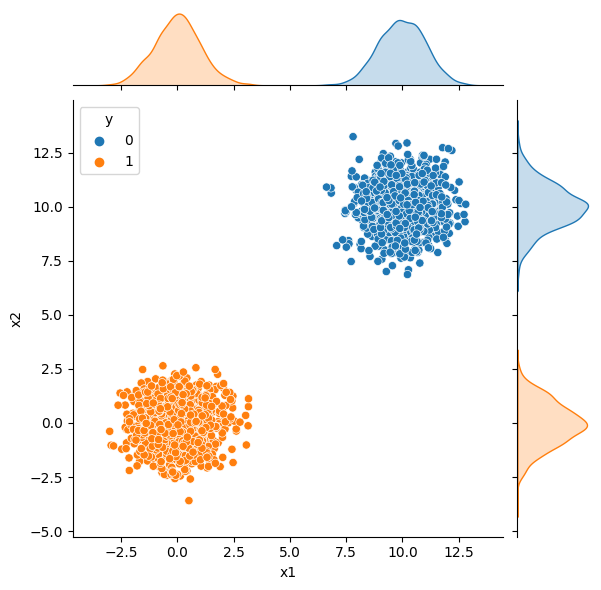

In [140]:
params1 =  {"myu":[10,10], "sigma": [[1,0],[0,1]], "size": 1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "size": 1000}
create_df(params1, params2);

# modeling

## 必須関数

In [141]:
def predict(df, x1, x2, y):
    lr = LogisticRegression(penalty='l2')
    lr.fit(df[[x1,x2]], df[y])    
    df["prob"] = lr.predict_proba(df[["x1", "x2"]])[:,0]    
    df["rprob"] = df["prob"].round(1)
        
    # sns.jointplot(data = df,x = x1, y = x2, hue= y)
    sns.jointplot(data = df,x = x1, y = x2, hue= "rprob")
    return df
            

## 完全分離

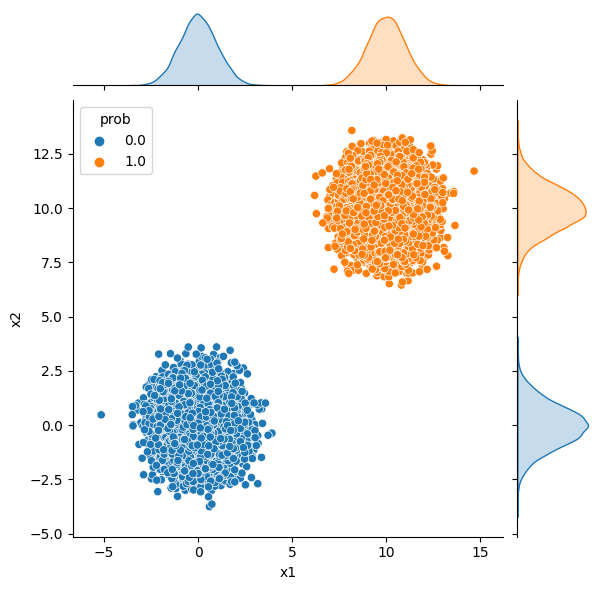

In [75]:
predict(df, "x1", "x2", "y");

## 一部重なり

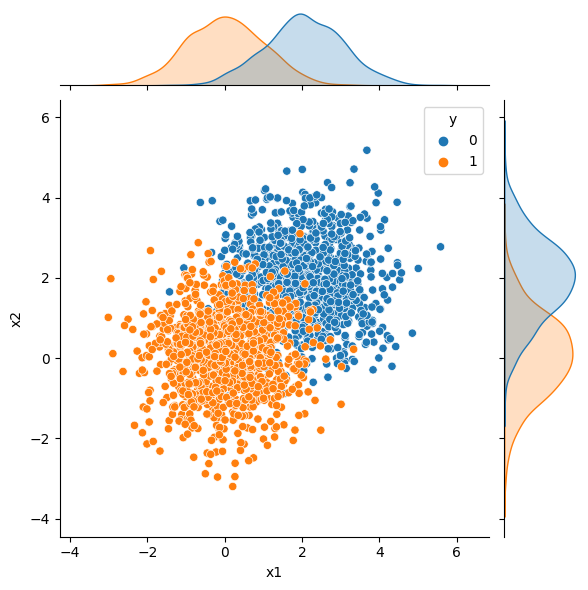

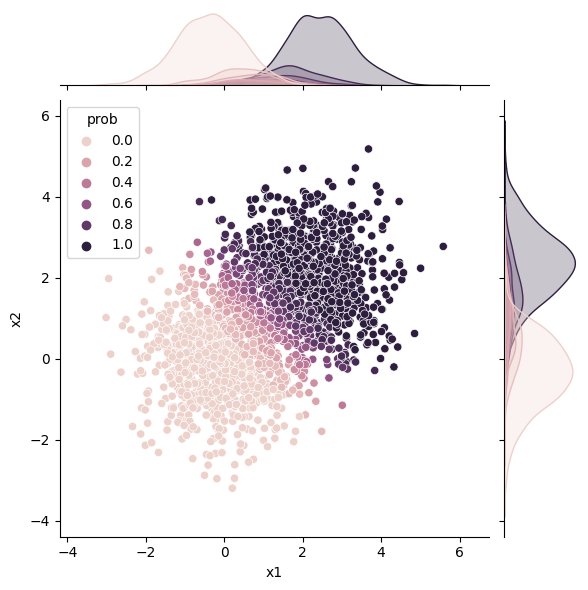

In [79]:
params1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "size": 1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "size": 1000}
df = create_df(params1, params2);
predict(df, "x1", "x2", "y");
print()

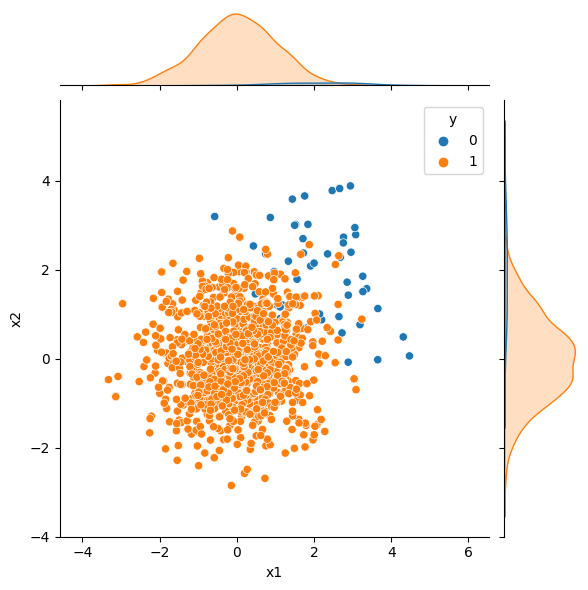

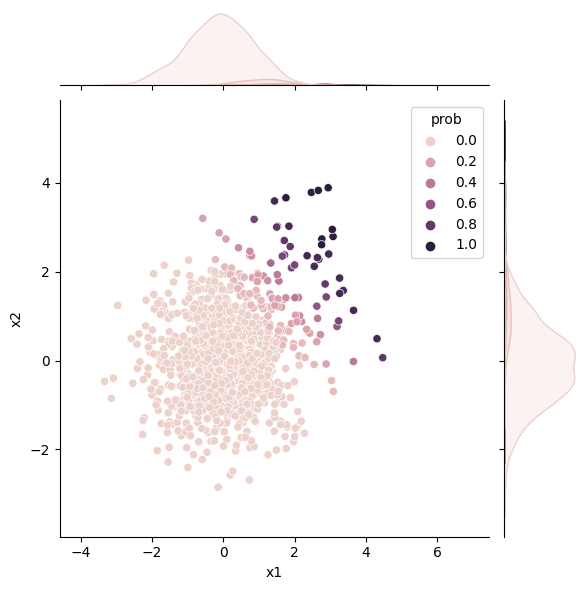

In [82]:
params1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "size": 50}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "size": 1000}
df = create_df(params1, params2);
predict(df, "x1", "x2", "y");
# print()

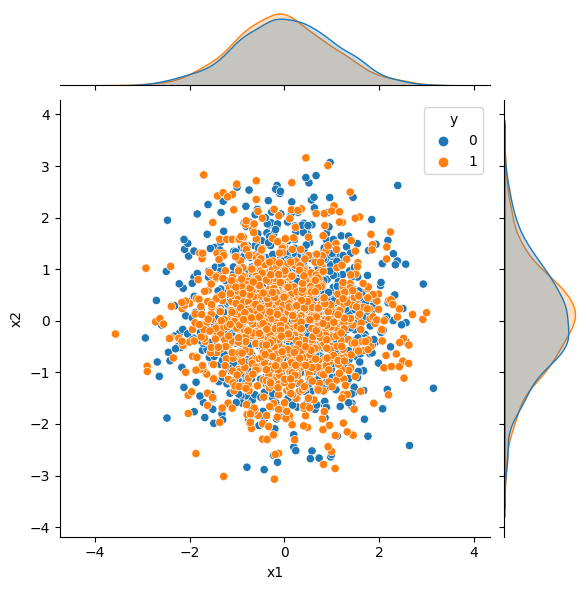

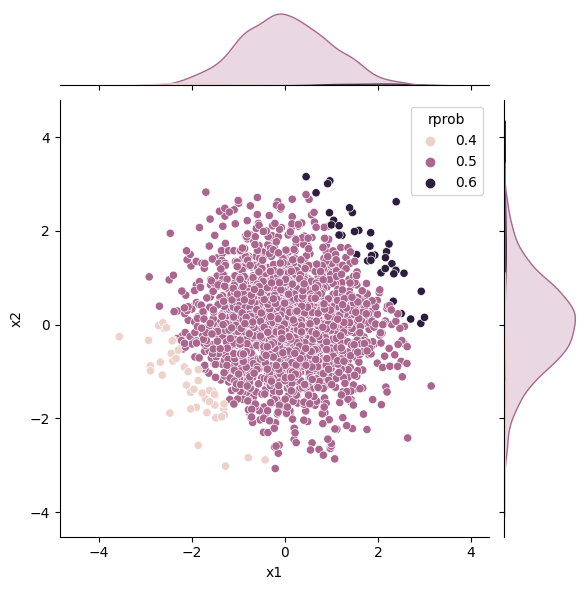

In [143]:
params1 =  {"myu":[0,0], "sigma": [[1,0],[0,1]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "size": 1000}
df = create_df(params1, params2);
df = predict(df, "x1", "x2", "y");
# print()

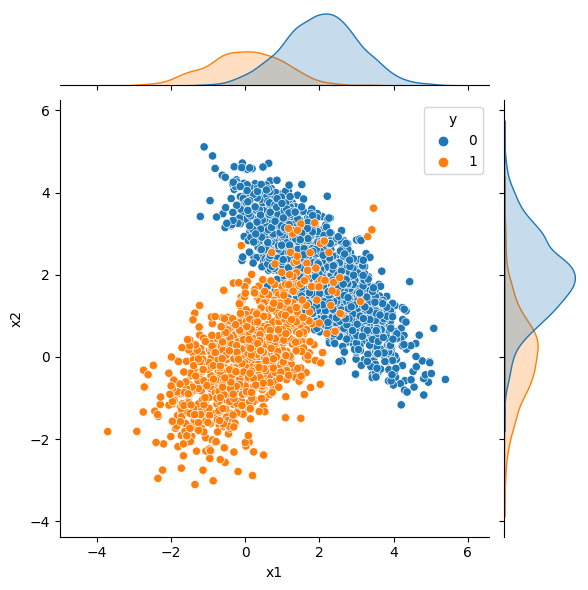

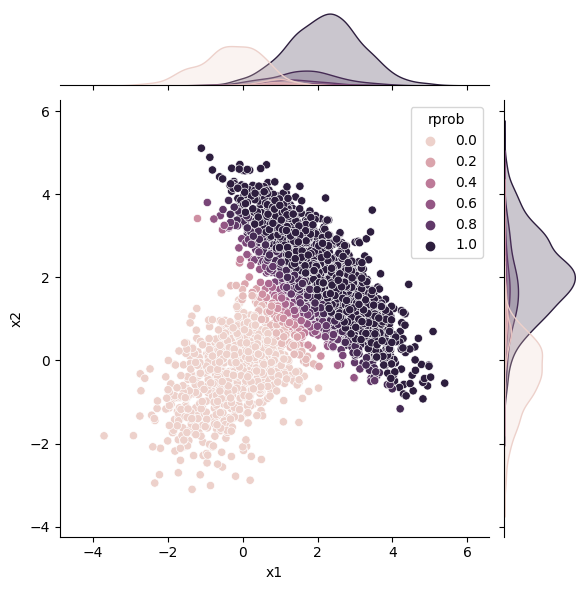

In [102]:
params1 =  {"myu":[2,2], "sigma": [[1,-0.8],[-0.8,1]], "size":2000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "size": 1000}
df = create_df(params1, params2);
df = predict(df, "x1", "x2", "y");
# print()

## random forest

In [130]:
def predict_random_forest(df, x1, x2, y):
    rf = RandomForestClassifier()
    rf.fit(df[[x1,x2]], df[y])    
    df["prob"] = rf.predict_proba(df[[x1, x2]])[:,0]    
    df["rprob"] = df["prob"].round(1)
        
    sns.jointplot(data = df,x = x1, y = x2, hue= "rprob")
    return df

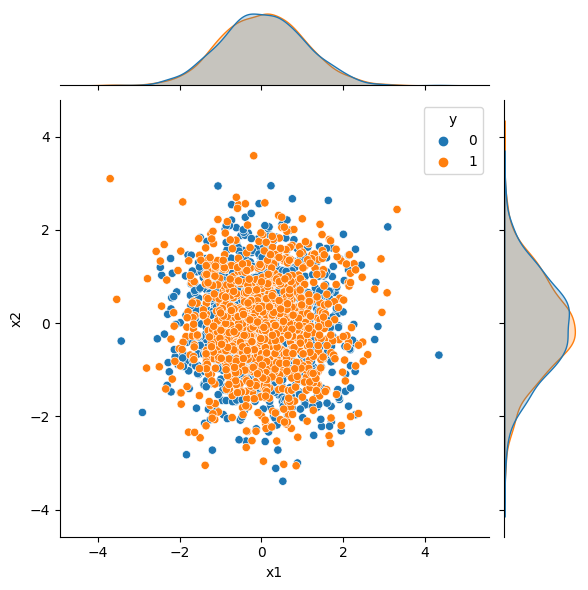

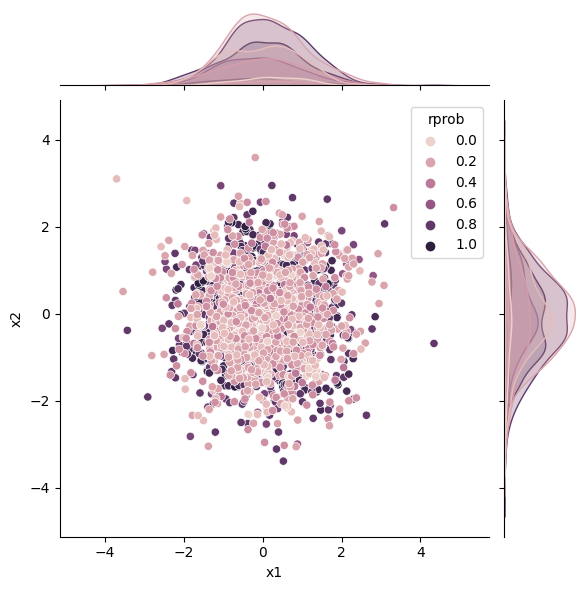

In [131]:
params1 =  {"myu":[0,0], "sigma": [[1,0],[0,1]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");

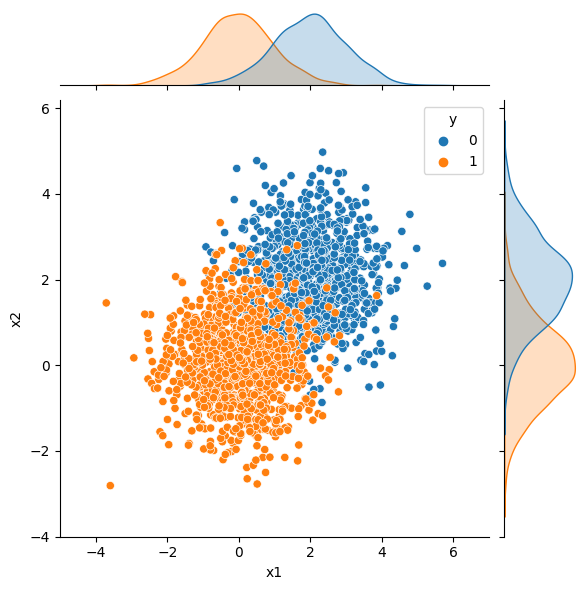

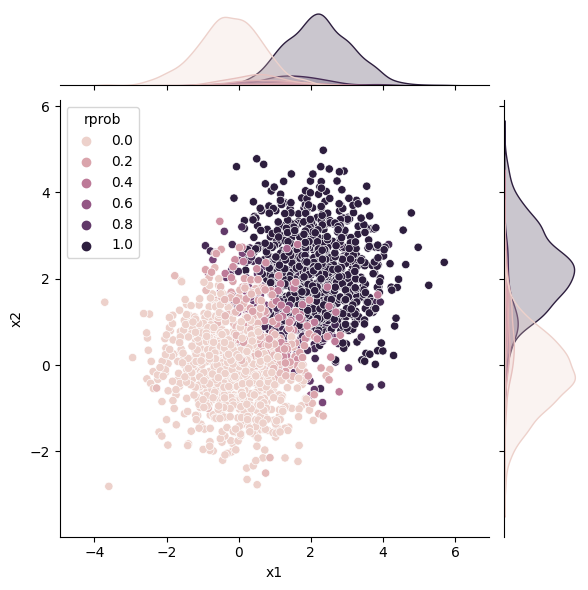

In [132]:
params1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "size": 1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "size": 1000}
df = create_df(params1, params2);
predict_random_forest(df, "x1", "x2", "y");
print()

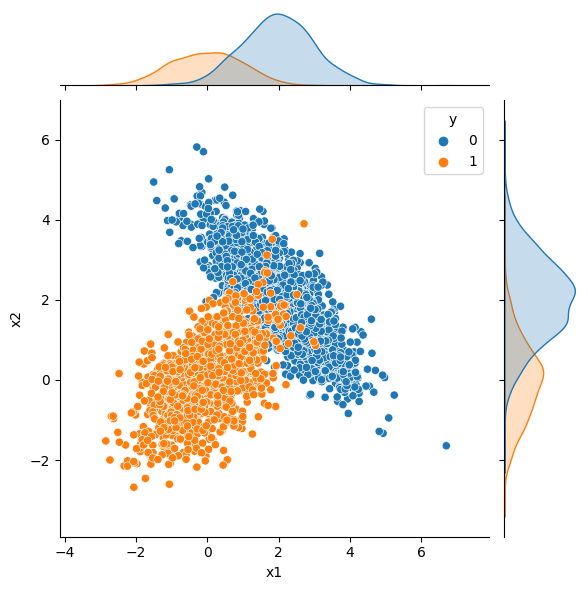

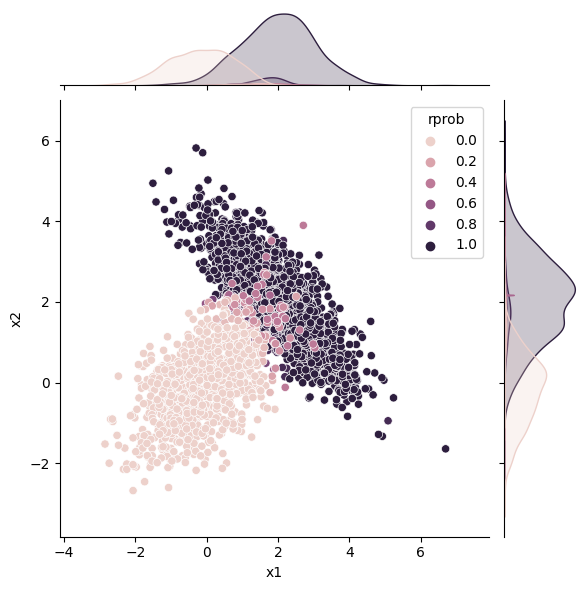

In [135]:
params1 =  {"myu":[2,2], "sigma": [[1,-0.8],[-0.8,1]], "size":2000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");
# print()

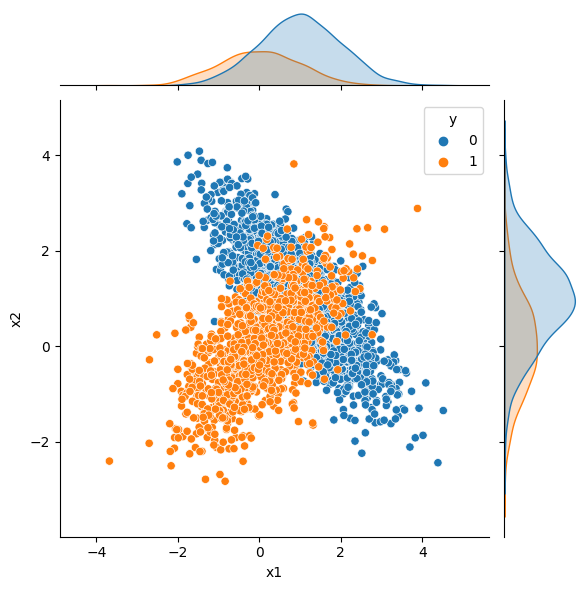

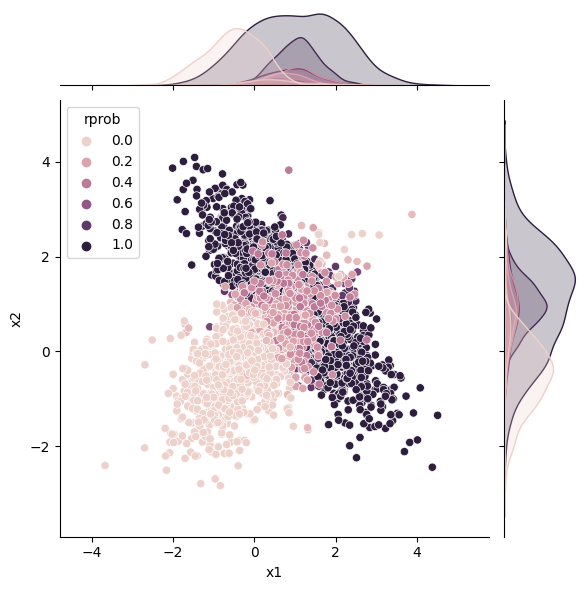

In [136]:
params1 =  {"myu":[1,1], "sigma": [[1,-0.8],[-0.8,1]], "size":2000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");
# print()

In [300]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [363]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 1)        
        self.F = F.relu
        self.sigmoid = F.sigmoid

    def forward(self, x):
        x = self.F(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x)
    
def fit(model, x, y):
    criterion = nn.BCELoss().cuda()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

    for i in tqdm(range(3000)):
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
def predict(model, x):
    with torch.no_grad():
        pred = model(x)
    return pred

def predict_MLP(df, x1,x2, y):
    model = MLP(2).cuda()
    
    X = torch.from_numpy(df[[x1, x2]].values).cuda().float()
    y = torch.from_numpy(df[["y"]].astype(float).values).cuda().float()
    
    fit(model, X, y)
    
    df["prob"] = predict(model, X).cpu()
    df["rprob"] = df["prob"].round(1)
    sns.jointplot(data = df,x = "x1", y = "x2", hue= "rprob")
    return df

100%|██████████| 3000/3000 [00:00<00:00, 3599.28it/s]


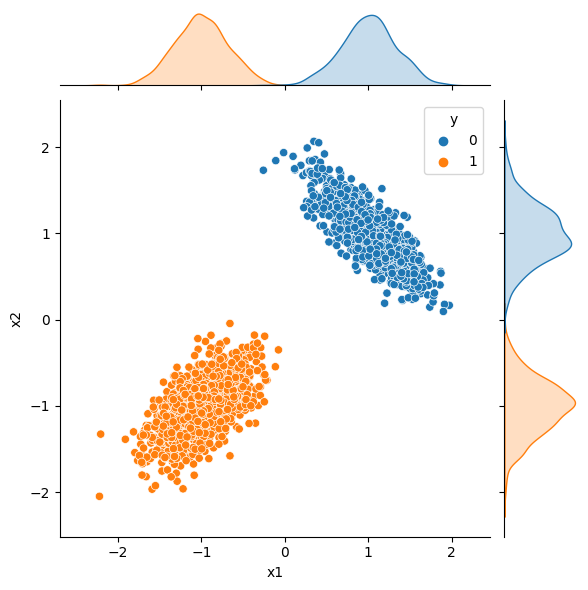

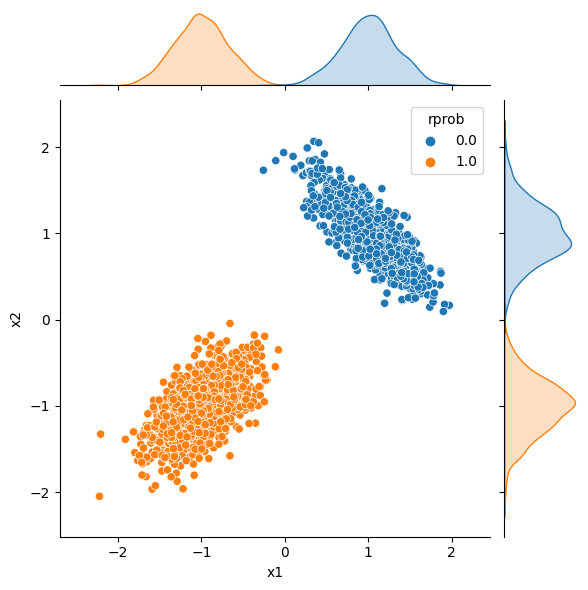

In [364]:
params1 =  {"myu":[1,1], "sigma": [[0.1,-0.08],[-0.08,0.1]], "size":1000}
params2 = {"myu":[-1,-1], "sigma": [[0.1,0.06],[0.06,0.1]], "size": 1000}
df = create_df(params1, params2);
df = predict_MLP(df, "x1", "x2", "y")

100%|██████████| 3000/3000 [00:00<00:00, 3930.10it/s]


1.0230393980207362


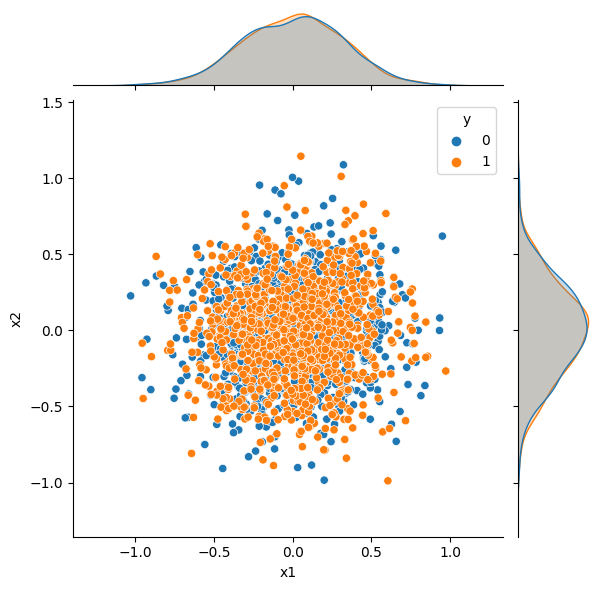

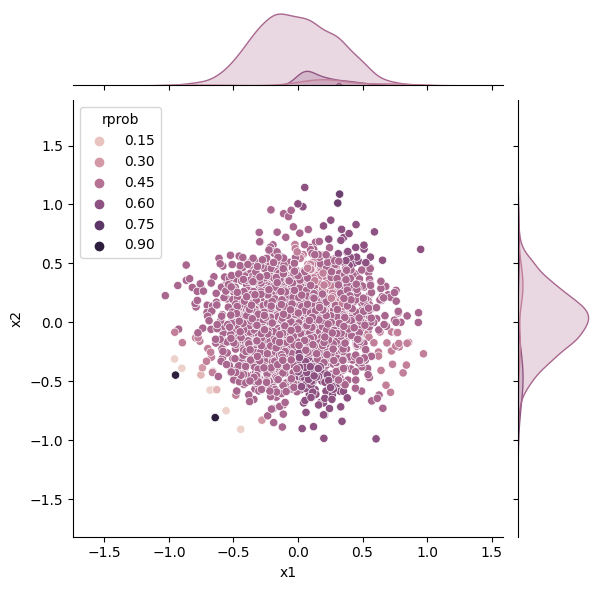

In [417]:
kyo1 = 0
kyo2 = 0
params1 =  {"myu":[0,0], "sigma": [[0.1,kyo1],[kyo1,0.1]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[0.1,kyo2],[kyo2,0.1]], "size": 1000}
df = create_df(params1, params2);
df = predict_MLP(df, "x1", "x2", "y")

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())

124010.70754214053


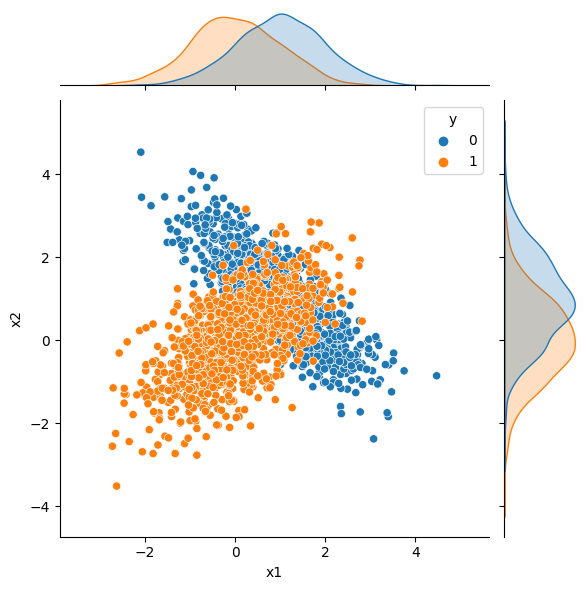

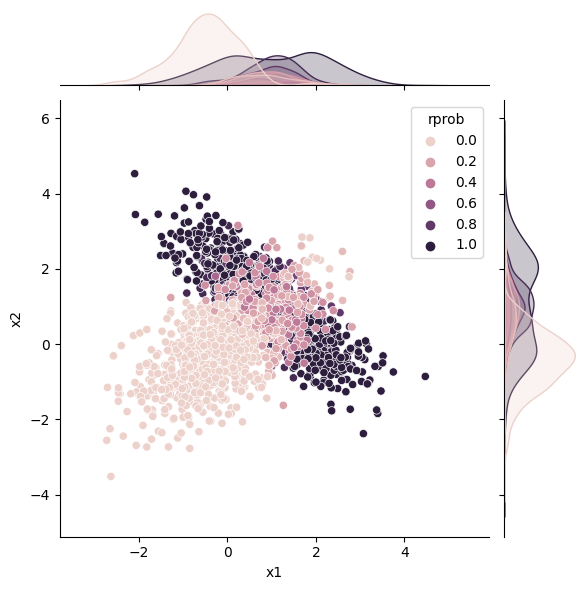

In [418]:
params1 =  {"myu":[1,1], "sigma": [[1,-0.8],[-0.8,1]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())

244507.82209067006


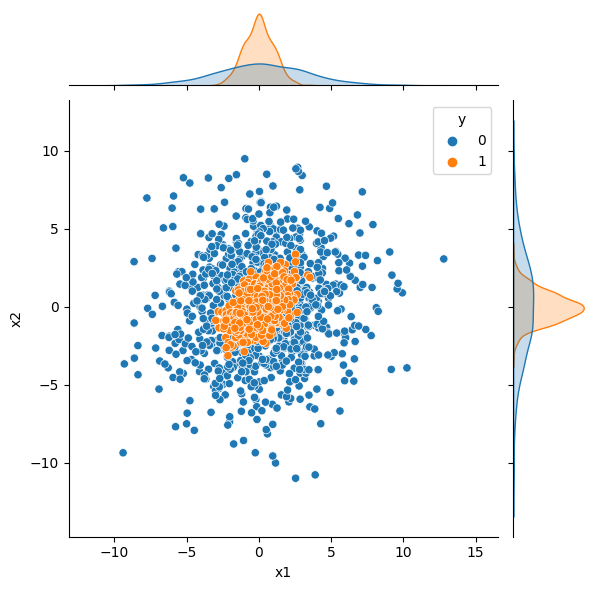

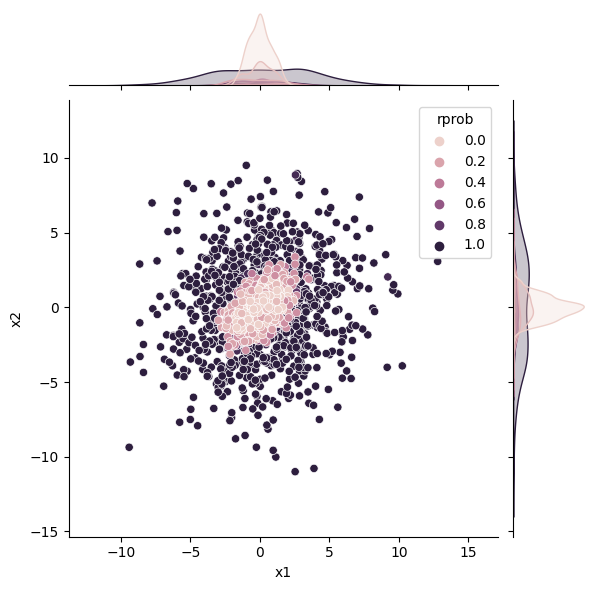

In [424]:
params1 =  {"myu":[0.05,0.05], "sigma": [[10,0.5],[0.5,10]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[1,0.5],[0.5,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())